In [ ]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8 MB 42 kB/s 
     |████████████████████████████████| 3.8 MB 37.6 MB/s 
     |████████████████████████████████| 449 kB 51.3 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=fcbbc11d298aa505933782570442c0368d75effb410d9808b98861a6cb7e27ed
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.0.0


In [ ]:
# create CNN Model

class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # initialize the model
        model = Sequential()
        inputShape = (height, width, depth) # (h, h, chanel)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(Conv2D(20, (5, 5), padding="same",input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(Conv2D(50, (5, 5), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # first (and only) set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

In [ ]:
dataset = "dataset"  # this folde must contain three subfolder with images
MODEL = "Scene.model" # name to store the model on disk
PLOT = "plot.png"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Change working directory
import os 
os.chdir("/content/drive/MyDrive/Deep Learning/CNN project")

In [ ]:
!dir

dataset\ (1).rar  test_examples\ (1).rar


In [ ]:
!pip install patool

     |████████████████████████████████| 77 kB 4.2 MB/s 


In [ ]:
import patoolib
dataset=patoolib.extract_archive("dataset (1).rar")

patool: Extracting dataset (1).rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Deep Learning/CNN project/dataset (1).rar"
patool:     with cwd='./Unpack_n94c9fir'
patool: ... dataset (1).rar extracted to `dataset (1)' (local file exists).


In [ ]:
test=patoolib.extract_archive("test_examples (1).rar")

patool: Extracting test_examples (1).rar ...
patool: running /usr/bin/unrar x -- "/content/drive/MyDrive/Deep Learning/CNN project/test_examples (1).rar"
patool:     with cwd='./Unpack_kz8ky5_e'
patool: ... test_examples (1).rar extracted to `test_examples (1)' (local file exists).


In [ ]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset)))
random.seed(42)
random.shuffle(imagePaths)

# progress bar 
with tqdm(total=len(imagePaths)) as pbar:
    
    # loop over the input images
    for idx, imagePath in enumerate(imagePaths):
        # load the image, pre-process it, and store it in the data list
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (28, 28))
        image = img_to_array(image)
        data.append(image)

        # extract the class label from the image path and update the
        # labels list
        label = imagePath.split(os.path.sep)[-2]

        

        if label == "Buildings":
            label = 0
        elif label == "Forest":
            label = 1
        elif label == "Sea":
            label = 2

        # print("pr: ", label)	

        labels.append(label)
        
        # update the progressbar
        pbar.update(1)

[INFO] loading images...


  0%|          | 0/1326 [00:00<?, ?it/s]

In [ ]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [ ]:
labels

array([0, 1, 0, ..., 0, 0, 2])

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [ ]:
trainX.shape

(994, 28, 28, 3)

In [ ]:
trainY.shape

(994,)

In [ ]:
trainY = to_categorical(trainY, num_classes=3)
testY = to_categorical(testY, num_classes=3)

In [ ]:
trainY[0]

array([1., 0., 0.], dtype=float32)

#DATA PREPROCESSING

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, 
                         width_shift_range=0.1, 
                         height_shift_range=0.1, 
                         shear_range=0.2, 
                         zoom_range=0.2, 
                         horizontal_flip=True, 
                         fill_mode="nearest")

In [ ]:
# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=3)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

print("[INFO] model complied...")

[INFO] compiling model...
[INFO] model complied...


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 20)        1520      
_________________________________________________________________
activation_4 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)             

In [ ]:
# train the network
print("[INFO] training network...")
H = model.fit(x=aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS, 
              verbose=1)

[INFO] training network...
Train for 31 steps, validate on 332 samples
Epoch 1/25
31/31 [==============================] - 7s 241ms/step - loss: 0.9516 - accuracy: 0.4844 - val_loss: 0.9243 - val_accuracy: 0.6265
Epoch 2/25
31/31 [==============================] - 1s 46ms/step - loss: 0.7617 - accuracy: 0.6466 - val_loss: 0.6538 - val_accuracy: 0.6837
Epoch 3/25
31/31 [==============================] - 1s 28ms/step - loss: 0.7044 - accuracy: 0.6819 - val_loss: 0.5824 - val_accuracy: 0.7620
Epoch 4/25
31/31 [==============================] - 1s 28ms/step - loss: 0.6285 - accuracy: 0.7235 - val_loss: 0.6009 - val_accuracy: 0.7229
Epoch 5/25
31/31 [==============================] - 1s 28ms/step - loss: 0.6034 - accuracy: 0.7547 - val_loss: 0.6099 - val_accuracy: 0.7319
Epoch 6/25
31/31 [==============================] - 1s 27ms/step - loss: 0.5306 - accuracy: 0.7703 - val_loss: 0.5373 - val_accuracy: 0.7620
Epoch 7/25
31/31 [==============================] - 1s 27ms/step - loss: 0.4904 - 

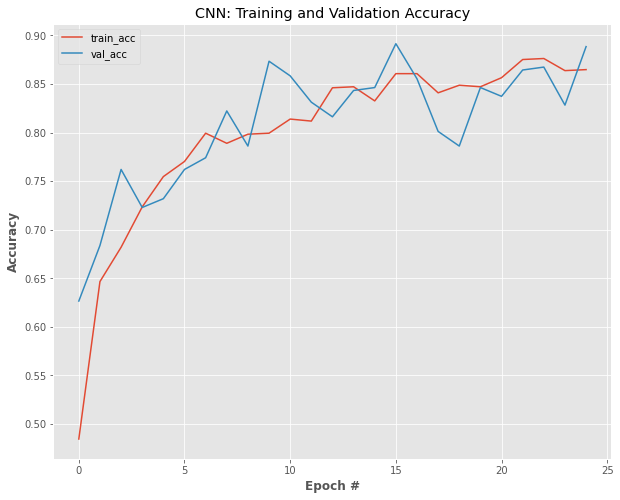

In [ ]:
# plot the training and validation accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

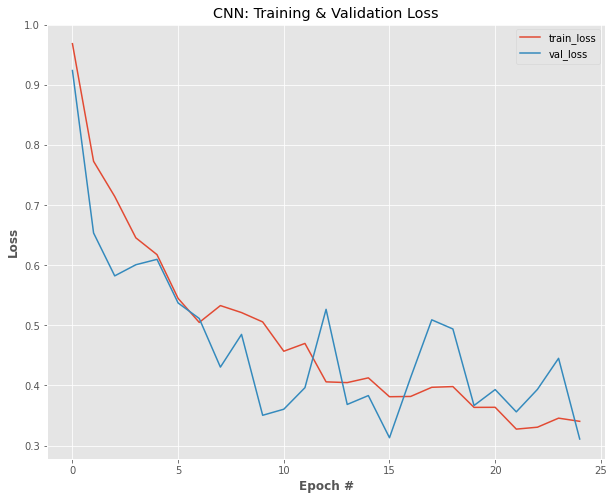

In [ ]:
# plot the training and validation loss
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    plt.grid(b=None)
    ax = fig.add_subplot(111)
    ax.imshow(img)

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
import pickle
import cv2

# # load the model 
print("[INFO] loading network and...")
#model = load_model(MODEL)

# grab the image paths and randomly shuffle themt
testImagePaths = sorted(list(paths.list_images('test')))   # data folder with 2 categorical folders

all_class = ["Buildings", "Forest", "Sea"]


# progress bar 
with tqdm(total=len(testImagePaths)) as pbar:
    
    for imagePath in testImagePaths:
        
        # load the image
        image = cv2.imread(imagePath)
        orig = image.copy()

        # pre-process the image for classification
        image = cv2.resize(image, (28, 28))
        image = image.astype("float") / 255.0
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # classify the input image
        prd_conf = model.predict(image)[0]

        # build the label
        label = all_class[np.argmax(prd_conf)]
        proba = prd_conf[np.argmax(prd_conf)]

        label = "{}: {:.2f}%".format(label, proba * 100)

        # draw the label on the image
        output = imutils.resize(orig, width=400)
        cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (255, 0, 0), 2)
        
        # convert img to rgb format and display in notebook
        img = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
        display_img(img)
        
        pbar.update(1)

[INFO] loading network and...


0it [00:00, ?it/s]

In [ ]:
!pip install gradio

     |████████████████████████████████| 871 kB 11.7 MB/s 
     |████████████████████████████████| 210 kB 50.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 52 kB 886 kB/s 
     |████████████████████████████████| 1.1 MB 43.8 MB/s 
     |████████████████████████████████| 2.0 MB 41.1 MB/s 
     |████████████████████████████████| 271 kB 54.1 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 144 kB 52.0 MB/s 
     |████████████████████████████████| 58 kB 5.8 MB/s 
     |████████████████████████████████| 10.9 MB 41.6 MB/s 
     |████████████████████████████████| 79 kB 8.6 MB/s 
     |████████████████████████████████| 856 kB 52.0 MB/s 
     |████████████████████████████████| 61 kB 471 kB/s 
     |████████████████████████████████| 3.6 MB 43.3 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=3a3

In [ ]:
import gradio as gr

In [ ]:
def predict_image(image):
    # load the image
    
    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)

        
    preds = model.predict(image)[0]
    result = dict()
    result["Buildings"] = round(float(list(preds)[0]), 3)
    result["Forest"] = round(float(list(preds)[1]), 3)
    result["Sea"] = round(float(list(preds)[2]), 3)
    
    print(result)
    
    return result

In [ ]:
im = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=im, outputs=label, capture_session=True, title="CNN Demo").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://24851.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f68fca205d0>,
 'http://127.0.0.1:7860/',
 'https://24851.gradio.app')